In [1]:
from google.colab import files
uploaded = files.upload()

Saving DelayedFlights.csv to DelayedFlights.csv


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("DelayedFlights.csv")
df.head()



,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [8]:
print(f"Shape: {df.shape}")
# Display column names and data types
df.info()
# Check for missing values in each column
missing_values = df.isnull().sum()
missing_values[missing_values > 0 ]


Shape: (1936758, 30)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 2

,0
ArrTime,7110
TailNum,5
ActualElapsedTime,8387
CRSElapsedTime,198
AirTime,8387
ArrDelay,8387
TaxiIn,7110
TaxiOut,455
CarrierDelay,689270
WeatherDelay,689270


In [9]:
# Drop the 'Unnamed: 0' column as it is just an index
df.drop(columns=['Unnamed: 0'], inplace=True)

# Fill missing delay reasons with 0
delay_cols = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
df[delay_cols] = df[delay_cols].fillna(0)

# Drop rows with missing critical flight time info
df.dropna(subset=['ArrTime', 'ActualElapsedTime', 'AirTime', 'TaxiIn', 'ArrDelay'], inplace=True)

# Check if there are still missing values
df.isnull().sum()


,0
Year,0
Month,0
DayofMonth,0
DayOfWeek,0
DepTime,0
CRSDepTime,0
ArrTime,0
CRSArrTime,0
UniqueCarrier,0
FlightNum,0


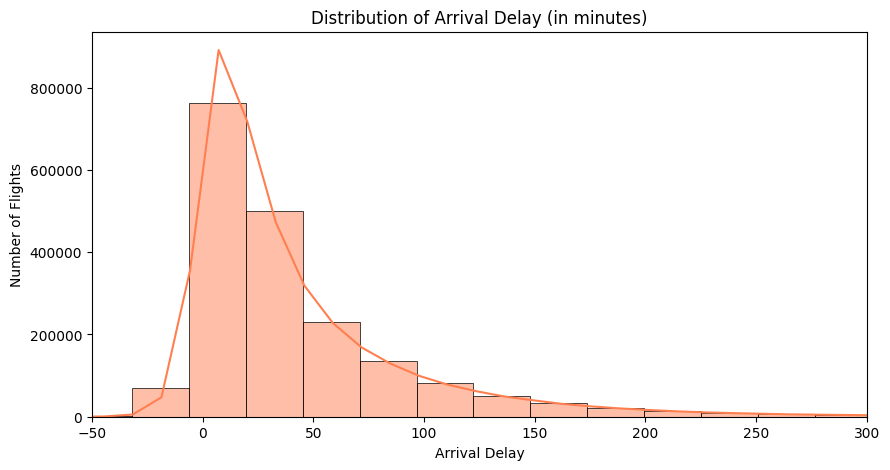

In [10]:
# Visualize the distribution of arrival delays
plt.figure(figsize=(10, 5))
sns.histplot(df['ArrDelay'], bins=100, kde=True, color="coral")
plt.title("Distribution of Arrival Delay (in minutes)")
plt.xlabel("Arrival Delay")
plt.ylabel("Number of Flights")
plt.xlim(-50, 300)
plt.show()

In [11]:
# Import skew function
from scipy.stats import skew

# Calculate skewness of arrival delay
arrival_skew = skew(df['ArrDelay'])

print(f"Skewness of Arrival Delay: {arrival_skew:.2f}")


Skewness of Arrival Delay: 3.95


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


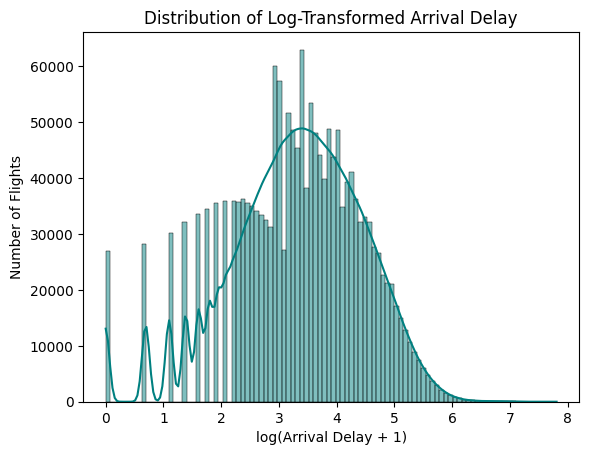

New skewness after log transform: nan


In [12]:
# Apply log transformation to reduce skewness
df['LogArrDelay'] = np.log1p(df['ArrDelay'])

# Visualize the transformed distribution
sns.histplot(df['LogArrDelay'], bins=100, kde=True, color='teal')
plt.title("Distribution of Log-Transformed Arrival Delay")
plt.xlabel("log(Arrival Delay + 1)")
plt.ylabel("Number of Flights")
plt.show()

# Check skewness again
print("New skewness after log transform:", skew(df['LogArrDelay']))


In [13]:
# Create binary target: 1 = delayed, 0 = on time
df['Delayed'] = (df['ArrDelay'] > 15).astype(int)

# Check class distribution
df['Delayed'].value_counts(normalize=True)


,proportion
Delayed,
1,0.630072
0,0.369928


In [14]:
# Define feature columns (numeric + some categorical)
features = ['Month', 'DayOfWeek', 'CRSDepTime', 'Distance', 'DepDelay', 'TaxiOut']
target = 'Delayed'

X = df[features]
y = df[target]


In [15]:
from sklearn.model_selection import train_test_split

# Split into train/test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


              precision    recall  f1-score   support

           0       0.81      0.85      0.83    142672
           1       0.91      0.88      0.89    243003

    accuracy                           0.87    385675
   macro avg       0.86      0.86      0.86    385675
weighted avg       0.87      0.87      0.87    385675



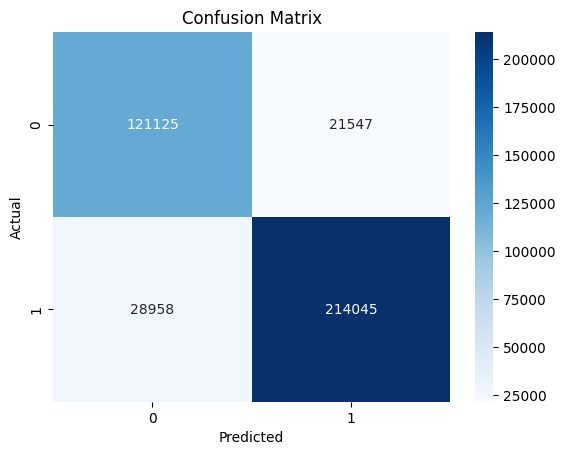

In [17]:
# Classification report (precision, recall, f1)
print(classification_report(y_test, y_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


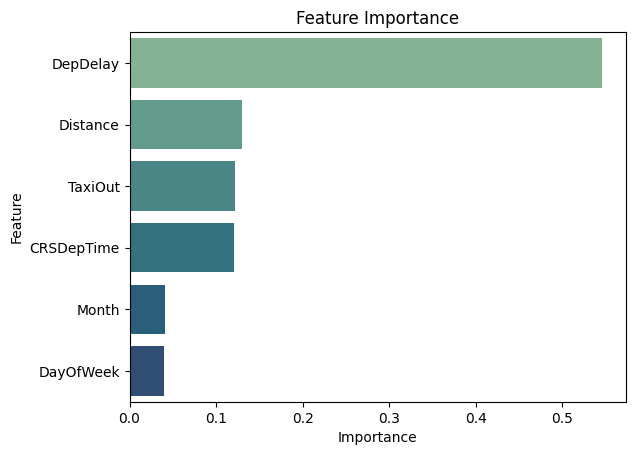

In [21]:
importances = model.feature_importances_
feature_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x='Importance', y='Feature', data=feature_df, hue='Feature', palette='crest', dodge=False)
plt.legend([],[], frameon=False)  # efsane görünmesin

plt.title("Feature Importance")
plt.show()
